## This codes find the best SVM model

# Libraries

In [3]:
# load libaries
import pandas as pd                  # for dataframe
import numpy as np                   # for dealing with numpy
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization

# a magic function that renders the figure in a notebook 
%matplotlib Inline

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)

# Import Data

In [4]:
# Import data
df = pd.read_csv('df19_20.csv')
df.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,LABEL
0,571103,57,1,1,0,0,0,0,1,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0,1
1,13452502,54,1,3,0,0,0,1,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0,0
2,14357306,27,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14828304,16,2,0,0,0,0,0,3,0,0,0,0,0,1,2,0,0,1,3,2,0,2,0,0
4,15194602,59,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0,0


# Import Sklearn Packages

In [5]:
from sklearn.model_selection import train_test_split   # even though this is usually used for train-test split, I am using it to sample the data for now to have stratified sampling
from sklearn.preprocessing import MinMaxScaler         # to normalize data

# Split Data

### double check and use the same Random State for all the models and SMOTE

In [6]:
# Set Input Variables and Target Variable
X = df.drop(columns = ['ENROLID', 'LABEL'], axis = 1)
y = df['LABEL']

In [7]:
# use train_test_split function to split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Text(0.5, 1.0, 'Class Distribution')

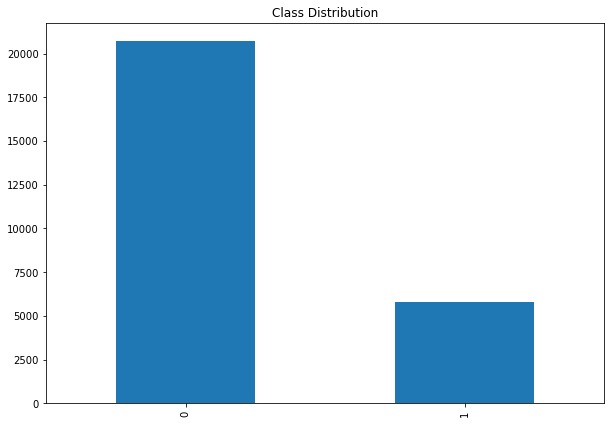

In [8]:
# label frequency
plt.figure(figsize=(10, 7))
ax = y_train.value_counts().plot.bar()
ax.set_title('Class Distribution')

## Normalize data

In [9]:
# normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Import SMOTE

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [11]:
# install first if using it first-time
import sys
!{sys.executable} -m pip install imblearn

In [12]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE

# SMOTE to oversample the data

In [13]:
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

In [14]:
X_train_sm

array([[0.859375  , 1.        , 0.        , ..., 0.        , 0.125     ,
        0.        ],
       [0.59375   , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03125   , 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.08333333,
        0.        ],
       [0.69935198, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.87376186, 1.        , 0.        , ..., 0.        , 0.04166667,
        0.        ]])

In [15]:
y_train_sm

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

([<matplotlib.axis.XTick at 0x24c8f0d3790>,
 [Text(0, 0, ''), Text(0, 0, '')])

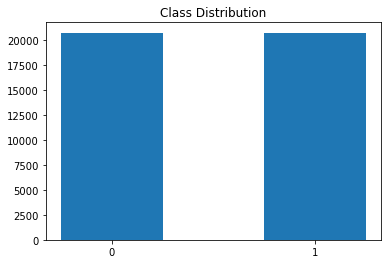

In [16]:
#search unique labels
lebels = list(np.unique(y_train_sm))

#count occurrences of each unique label
lebel_count = list(np.unique(y_train_sm, return_counts=True)[1])

# label frequency
plt.bar(lebels, lebel_count, width = 0.5)
plt.title('Class Distribution')

import math
new_list = range(math.floor(min(lebels)), math.ceil(max(lebels))+1)
plt.xticks(new_list)

# Modelling

# Neural Network

In [15]:
# Haixiao used tensorflow, but I still need to figure out how to get that to work

### sklearn MLPClassifier

In [16]:
from sklearn.neural_network import MLPClassifier
# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

In [17]:
NN_clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=400)
# Note: The default solver 'adam' works pretty well on relatively large datasets (with thousands of training samples or more)
# max_iter=400 (default was at 200, which failed to converge)

In [18]:
NN_clf.fit(X_train_sm, y_train_sm)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=400,
              random_state=1)

In [19]:
print("model score: %.3f" % NN_clf.score(X_test, y_test))

model score: 0.708


In [20]:
# try with array of different parameters

# SVM

### This one is actually the best model for SVM so far (even after hyperparameter tuning later on)

In [21]:
#Import svm model
from sklearn import svm

In [22]:
#Create a svm Classifier
# SVM_clf = svm.SVC(kernel='linear') # Linear Kernel
SVM_clf = svm.SVC(probability=True) # probability=True
#Train the model
SVM_clf.fit(X_train_sm, y_train_sm)

SVC(probability=True)

In [23]:
print("model score: %.3f" % SVM_clf.score(X_test, y_test))

model score: 0.712


## Evaluate the Model

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_curve, auc
from sklearn.metrics import f1_score, precision_score 
from sklearn import metrics

In [25]:
# predict 2020 data
NN_pred = NN_clf.predict(X_test)
SVM_pred = SVM_clf.predict(X_test)

In [26]:
# Classification Report
print(classification_report(y_test, NN_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      8880
           1       0.41      0.72      0.52      2491

    accuracy                           0.71     11371
   macro avg       0.65      0.71      0.65     11371
weighted avg       0.79      0.71      0.73     11371



In [27]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      8880
           1       0.41      0.70      0.52      2491

    accuracy                           0.71     11371
   macro avg       0.65      0.71      0.66     11371
weighted avg       0.79      0.71      0.73     11371



C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Neural Network')

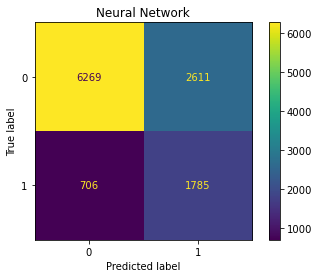

In [28]:
plt.figsize = (20, 14)
plot_confusion_matrix(NN_clf, X_test, y_test)
plt.title("Neural Network")

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

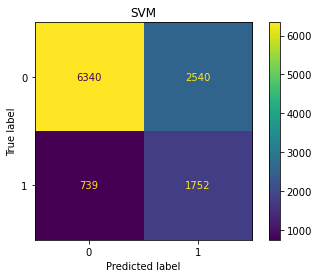

In [29]:
plt.figsize = (20, 14)
plot_confusion_matrix(SVM_clf, X_test, y_test)
plt.title("SVM")

In [30]:
print("\nNN")
print("F1:", metrics.f1_score(y_test, NN_pred, labels=np.unique(NN_pred)))
print("Precision:", metrics.precision_score(y_test, NN_pred, labels=np.unique(NN_pred)))
print("\nSVM")
print("F1:", metrics.f1_score(y_test, SVM_pred, labels=np.unique(SVM_pred)))
print("Precision:", metrics.precision_score(y_test, SVM_pred, labels=np.unique(SVM_pred)))


NN
F1: 0.5183679395963409
Precision: 0.40605095541401276

SVM
F1: 0.5165855816010615
Precision: 0.4082013047530289


In [31]:
# look at sensitivity, precision, recall aucroc

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [33]:
# Calculate the probability ROC
y_pred_proba = SVM_clf.predict_proba(X_test)[:, 1]

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [35]:
# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, y_pred_proba)

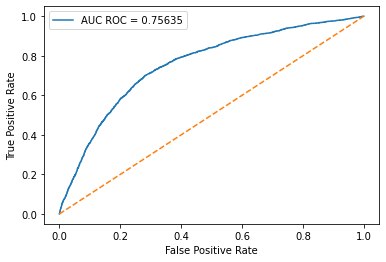

In [36]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [37]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99808559, 0.99808559,
       1.        ])

In [38]:
tpr

array([0.00000000e+00, 4.01445203e-04, 2.40867122e-03, ...,
       9.99197110e-01, 1.00000000e+00, 1.00000000e+00])

In [39]:
thresholds

array([1.86304986, 0.86304986, 0.84962842, ..., 0.17851749, 0.17653598,
       0.13316157])

In [40]:
y_pred_proba

array([0.3050451 , 0.31737577, 0.74213831, ..., 0.5195778 , 0.2413654 ,
       0.21256475])

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

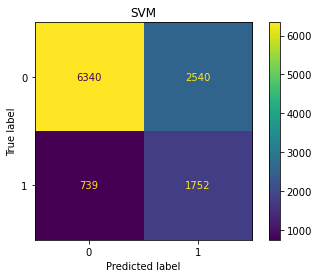

In [41]:
plt.figsize = (20, 14)
plot_confusion_matrix(SVM_clf, X_test, y_test)
plt.title("SVM")

In [42]:
SVM_pred = SVM_clf.predict(X_test)
print("\nSVM")
print("F1:", metrics.f1_score(y_test, SVM_pred, labels=np.unique(SVM_pred)))
print("Precision:", metrics.precision_score(y_test, SVM_pred, labels=np.unique(SVM_pred)))
print("Recall:", metrics.recall_score(y_test, SVM_pred, labels=np.unique(SVM_pred)))


SVM
F1: 0.5165855816010615
Precision: 0.4082013047530289
Recall: 0.7033319951826575


# save the model

In [43]:
import pickle
filename = 'SVM_model.sav'
pickle.dump(SVM_clf, open(filename, 'wb'))

# hyperparameter tuning with GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Define the hyperparameters to tune
# hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
#                    'kernel': ['linear', 'rbf', 'sigmoid'],
#                    'degree': [0, 1, 2, 3, 4, 5, 6],
#                    'gamma': [0.1, 1, 10, 100]}

hyperparameters = {'C': [1],
                   'kernel': ['rbf'],
                   'degree': [1],
                   'gamma': ['scale', 'auto']}

# Create a Grid Search object with the SVM model and hyperparameters to tune
grid_search = GridSearchCV(SVM_clf, hyperparameters, cv=5, return_train_score = True)

In [47]:
# Fit the Grid Search object to the training data
grid_search.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search.best_params_}')

# Train the model on the training set with the best hyperparameters
SVM_best = svm.SVC(**grid_search.best_params_, probability=True)
SVM_best.fit(X_train_sm, y_train_sm)

Best hyperparameters found: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=1, degree=1, probability=True)

In [ ]:
# 8452 sec

In [48]:
# Calculate the probability ROC
y_pred_proba_tuned = SVM_best.predict_proba(X_test)[:, 1]

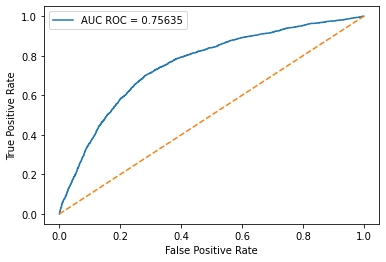

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tuned)

# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, y_pred_proba_tuned)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

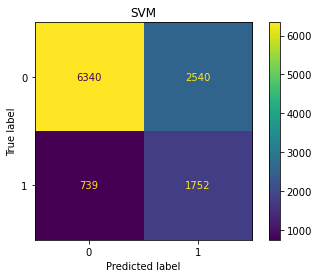

In [50]:
plt.figsize = (20, 14)
plot_confusion_matrix(SVM_best, X_test, y_test)
plt.title("SVM")

In [56]:
# Define the hyperparameters to tune
# hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
#                    'kernel': ['linear', 'rbf', 'sigmoid'],
#                    'degree': [0, 1, 2, 3, 4, 5, 6],
#                    'gamma': [0.1, 1, 10, 100]}

hyperparameters_2 = {'C': [0.1, 1, 10],
                   'kernel': ['rbf'],
                   'degree': [1],
                   'gamma': ['scale']}

# Create a Grid Search object with the SVM model and hyperparameters to tune
grid_search_2 = GridSearchCV(SVM_clf, hyperparameters_2, cv=5, return_train_score = True)

In [57]:
# Fit the Grid Search object to the training data
grid_search_2.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search_2.best_params_}')

# Train the model on the training set with the best hyperparameters
SVM_best_2 = svm.SVC(**grid_search_2.best_params_, probability=True)
SVM_best_2.fit(X_train_sm, y_train_sm)

Best hyperparameters found: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=1, degree=1, probability=True)

In [ ]:
# 7480 sec

In [58]:
# Define the hyperparameters to tune
# hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
#                    'kernel': ['linear', 'rbf', 'sigmoid'],
#                    'degree': [0, 1, 2, 3, 4, 5, 6],
#                    'gamma': [0.1, 1, 10, 100]}

hyperparameters_3 = {'C': [1],
                   'kernel': ['rbf'],
                   'degree': [2, 4, 5],
                   'gamma': ['scale']}

# Create a Grid Search object with the SVM model and hyperparameters to tune
grid_search_3 = GridSearchCV(SVM_clf, hyperparameters_3, cv=5, return_train_score = True)

In [59]:
# Fit the Grid Search object to the training data
grid_search_3.fit(X_train_sm, y_train_sm)

In [75]:
# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search_3.best_params_}')

Best hyperparameters found: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Train the model on the training set with the best hyperparameters
SVM_best_3 = svm.SVC(**grid_search_3.best_params_, probability=True)
SVM_best_3.fit(X_train_sm, y_train_sm)

In [ ]:
# 7498 sec

In [62]:
# Define the hyperparameters to tune
# hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
#                    'kernel': ['linear', 'rbf', 'sigmoid'],
#                    'degree': [0, 1, 2, 3, 4, 5, 6],
#                    'gamma': [0.1, 1, 10, 100]}

hyperparameters_4 = {'C': [1],
                   'kernel': ['linear', 'rbf', 'sigmoid'],
                   'degree': [1],
                   'gamma': ['scale']}

# Create a Grid Search object with the SVM model and hyperparameters to tune
grid_search_4 = GridSearchCV(SVM_clf, hyperparameters_4, cv=5, return_train_score = True)

In [63]:
# Fit the Grid Search object to the training data
grid_search_4.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search_4.best_params_}')

# Train the model on the training set with the best hyperparameters
SVM_best_4 = svm.SVC(**grid_search_4.best_params_, probability=True)
SVM_best_4.fit(X_train_sm, y_train_sm)

Best hyperparameters found: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=1, degree=1, probability=True)

In [ ]:
# 7565 sec

In [64]:
# Calculate the probability ROC
y_pred_proba_tuned_4 = SVM_best_4.predict_proba(X_test)[:, 1]

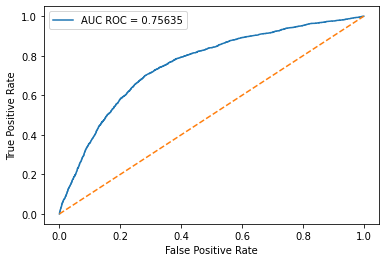

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tuned_4)

# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, y_pred_proba_tuned_4)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

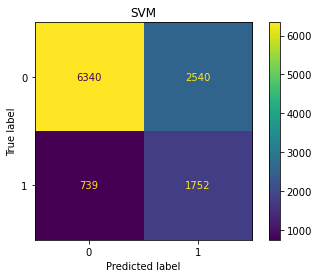

In [66]:
plt.figsize = (20, 14)
plot_confusion_matrix(SVM_best_4, X_test, y_test)
plt.title("SVM")

In [85]:
# gridsearchCV
hyperparameters_5 = {'C': [1],
                   'kernel': ['rbf'],
                   'degree': [2, 4, 5],
                   'gamma': ['scale']}

SVC = svm.SVC(probability=True) # probability=True
grid_search_5 = GridSearchCV(SVC, hyperparameters_5, cv=5, return_train_score = True)

In [ ]:
# Fit the Grid Search object to the training data
grid_search_5.fit(X_train_sm, y_train_sm)

In [69]:
# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search_5.best_params_}')

Best hyperparameters found: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [70]:
# Train the model on the training set with the best hyperparameters
SVM_best_5 = svm.SVC(**grid_search_5.best_params_, probability=True)
SVM_best_5.fit(X_train_sm, y_train_sm)

SVC(C=1, degree=2, probability=True)

In [ ]:
#12000 sec

In [71]:
# Calculate the probability ROC
y_pred_proba_tuned_5 = SVM_best_5.predict_proba(X_test)[:, 1]

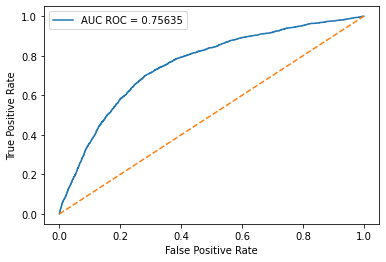

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tuned_5)

# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, y_pred_proba_tuned_5)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

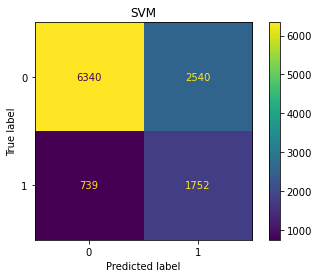

In [73]:
plt.figsize = (20, 14)
plot_confusion_matrix(SVM_best_5, X_test, y_test)
plt.title("SVM")

In [87]:
# 6
hyperparameters_6 = {'C': [0.1, 1, 10],
                   'kernel': ['rbf'],
                   'degree': [2],
                   'gamma': ['scale']}
SVC = svm.SVC(probability=True) # probability=True
# Create a Grid Search object with the SVM model and hyperparameters to tune
grid_search_6 = GridSearchCV(SVC, hyperparameters_6, cv=5, return_train_score = True)

In [88]:
# Fit the Grid Search object to the training data
grid_search_6.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search_6.best_params_}')

Best hyperparameters found: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [89]:
# Train the model on the training set with the best hyperparameters
SVM_best_6 = svm.SVC(**grid_search_6.best_params_, probability=True)
SVM_best_6.fit(X_train_sm, y_train_sm)

SVC(C=10, degree=2, probability=True)

In [90]:
# Calculate the probability ROC
y_pred_proba_tuned_6 = SVM_best_6.predict_proba(X_test)[:, 1]

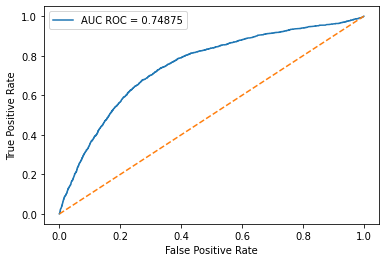

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tuned_6)

# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, y_pred_proba_tuned_6)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

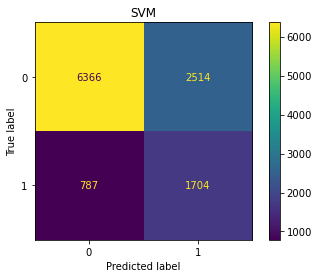

In [92]:
plt.figsize = (20, 14)
plot_confusion_matrix(SVM_best_6, X_test, y_test)
plt.title("SVM")

In [98]:
# PRC
from sklearn.metrics import auc, precision_recall_curve
precision6, recall6, thresholds6 = precision_recall_curve(y_test, y_pred_proba_tuned_6)

In [101]:
# AUPRC
auprc = auc(recall6, precision6)

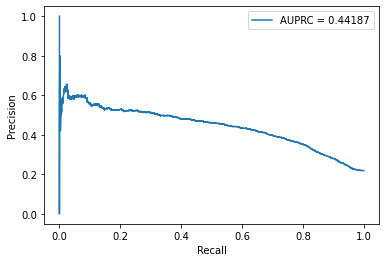

In [102]:
# Plot the PRC
plt.plot(recall6, precision6, label=f'AUPRC = {auprc:.5f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [105]:
# find max f1 score
f1_scores = (2*recall6*precision6)/(recall6+precision6)
print('Best threshold: ', thresholds6[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))

Best threshold:  0.9453023105777474
Best F1-Score:  nan


C:\Users\nasri\AppData\Local\Temp\ipykernel_1392\422139283.py:2: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2*recall6*precision6)/(recall6+precision6)


In [110]:
# another way to account for when denominator is zero
numerator = 2 * recall6 * precision6
denom = recall6 + precision6
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = thresholds6[np.argmax(f1_scores)]

In [113]:
print('Best threshold: ', max_f1_thresh)
print('Best F1-Score: ', max_f1)

Best threshold:  0.5245120291771758
Best F1-Score:  0.5113446017968631


In [114]:
# 7
hyperparameters_7 = {'C': [10],
                   'kernel': ['poly'],
                   'degree': [1,2,3,4],
                   'gamma': ['scale']}
SVC = svm.SVC(probability=True) # probability=True
# Create a Grid Search object with the SVM model and hyperparameters to tune
grid_search_7 = GridSearchCV(SVC, hyperparameters_7, cv=5, return_train_score = True)

In [ ]:
# Fit the Grid Search object to the training data
grid_search_7.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search_7.best_params_}')

In [ ]:
# Train the model on the training set with the best hyperparameters
SVM_best_7 = svm.SVC(**grid_search_7.best_params_, probability=True)
SVM_best_7.fit(X_train_sm, y_train_sm)

In [ ]:
# 

# trying the final 2 SVCs
## this is after all the hyperparameter tunings, and the best two are evaluated. 
#### 1: C = 10, kernel = 'poly', degree = 3, gamma = 'scale',probability=True
#### 2: C = 10, kernel = 'rbf', gamma = 'scale',probability=True

In [18]:
#Import svm model
from sklearn import svm

In [19]:
#Create a svm Classifier  with poly kernel
SVM_clf = svm.SVC(C = 10, kernel = 'poly', degree = 3, gamma = 'scale',probability=True) # probability=True
#Train the model  #725 sec
SVM_clf.fit(X_train_sm, y_train_sm)

SVC(C=10, kernel='poly', probability=True)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix

In [20]:
# Calculate the probability ROC
y_pred_proba_poly = SVM_clf.predict_proba(X_test)[:, 1]

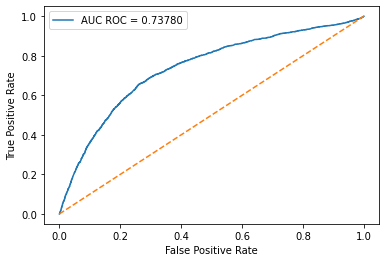

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_poly)

# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, y_pred_proba_poly)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

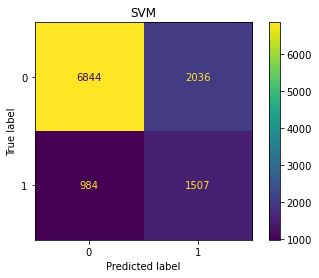

In [26]:
plt.figsize = (20, 14)
plot_confusion_matrix(SVM_clf, X_test, y_test)
plt.title("SVM")

In [27]:
# PRC
from sklearn.metrics import auc, precision_recall_curve
precision_poly, recall_poly, thresholds_poly = precision_recall_curve(y_test, y_pred_proba_poly)

In [28]:
# AUPRC
auprc_poly = auc(recall_poly, precision_poly)

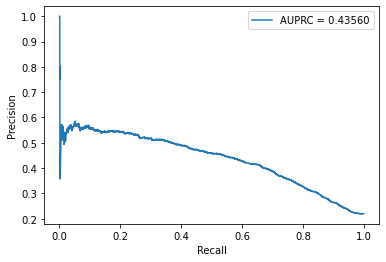

In [29]:
# Plot the PRC
plt.plot(recall_poly, precision_poly, label=f'AUPRC = {auprc_poly:.5f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [31]:
# another way to account for when denominator is zero
numerator = 2 * recall_poly * precision_poly
denom = recall_poly + precision_poly
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = thresholds_poly[np.argmax(f1_scores)]

In [32]:
print('Best threshold: ', max_f1_thresh)
print('Best F1-Score: ', max_f1)

Best threshold:  0.47070129828724866
Best F1-Score:  0.5069196081480329


In [33]:
#Create a svm Classifier with rbf kernel
SVM_rbf = svm.SVC(C = 10, kernel = 'rbf', gamma = 'scale',probability=True) # probability=True
#Train the model  #838 sec
SVM_rbf.fit(X_train_sm, y_train_sm)

SVC(C=10, probability=True)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix

In [34]:
# Calculate the probability ROC
y_pred_proba_rbf = SVM_rbf.predict_proba(X_test)[:, 1]

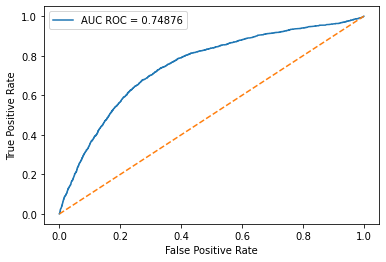

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rbf)

# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, y_pred_proba_rbf)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

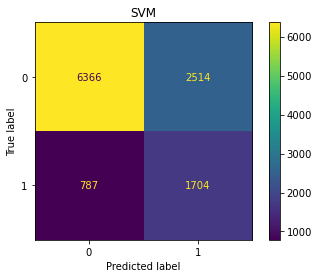

In [36]:
plt.figsize = (20, 14)
plot_confusion_matrix(SVM_rbf, X_test, y_test)
plt.title("SVM")

In [37]:
# PRC
from sklearn.metrics import auc, precision_recall_curve
precision_rbf, recall_rbf, thresholds_rbf = precision_recall_curve(y_test, y_pred_proba_rbf)

In [38]:
# AUPRC
auprc_rbf = auc(recall_rbf, precision_rbf)

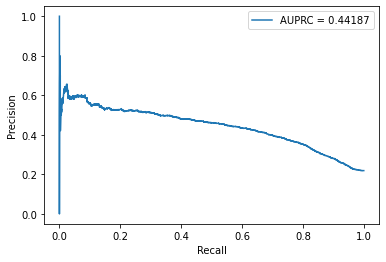

In [39]:
# Plot the PRC
plt.plot(recall_rbf, precision_rbf, label=f'AUPRC = {auprc_rbf:.5f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [40]:
# another way to account for when denominator is zero
numerator = 2 * recall_rbf * precision_rbf
denom = recall_rbf + precision_rbf
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = thresholds_rbf[np.argmax(f1_scores)]

In [41]:
print('Best threshold: ', max_f1_thresh)
print('Best F1-Score: ', max_f1)

Best threshold:  0.5242011694952975
Best F1-Score:  0.5113446017968631


In [43]:
# loading library
import pickle

In [44]:
# load saved model
with open('SVM_model.sav' , 'rb') as f:
    svm_clf = pickle.load(f)

In [45]:
svm_clf.predict_proba(X_test)[:, 1]

array([0.3050451 , 0.31737577, 0.74213831, ..., 0.5195778 , 0.2413654 ,
       0.21256475])